# *The Kalevala* - Textual Analysis

The following analysis was done as one of two possible options for the Final Project of CSCI 140 - Programming for Data Science (taught by Professor Dana Willner) in Fall 2017.

The data used for this project is an excerpt from the Finnish national epic poem, The Kalevala (link: https://github.com/Daniel-Tay/daniel-tay.github.io/blob/master/Kalevala_ka.txt). As part of this project, words were classified based on their vowel class.

As part of this project, the data was reformatted to allow for some analysis and visualization.

# Background Information
There are eight vowels in the Finnish language, and these vowels can be categorised into three different groups:
1. Front vowels (ä, ö, y)
2. Back vowels (a, o, u)
3. Middle/Neutral vowels (e, i)

A word's vowel pattern shows the order in which each type of vowel appears in a word. This means that a vowel pattern consists of a combination of the letters F(for front), B(for back), and M(for middle). For example, the word *merelle* has a vowel pattern of MMM; consonants are ignored, and words with no vowels in them are coded as an empty string.

Based on a word's vowel pattern, it can be classified into three different groups:
1. Pure: All vowels in the word are of the same type (i.e.  all vowels are front/back/middle vowels only)
2. Mixed: Contains front and middle OR back and middle vowels
3. Aberrant: Contains both front and back vowels (can also contain middle vowels)

A language is said to exhibit vowel harmony if the vowels in words exist in the same sub-class (i.e. pure/mixed words only).

# Setting up the workspace and importing the data

In [1]:
% matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import scipy.stats as ss
import seaborn as sns
import re
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('darkgrid')
import string

My first course of action was to extract the words in the excerpt of *The Kalevala* into a list.

In [2]:
kale = open('Kalevala_ka.txt', 'r')
templist = []
table = str.maketrans(string.punctuation, ' '*len(string.punctuation))
for line in kale:
    line = line.rstrip().lower().translate(table).rstrip()
    templist.append(line)
kalevala = pd.Series(templist)
kale.close()

#I then converted the file into a list.
kalevala_list = []
for word in kalevala:
    kalevala_list += [re.findall('\w+', word)]

#Verifying the output
print(kalevala_list[0:5])

[['vaka', 'vanha', 'väinämöinen'], ['toinen', 'seppo', 'ilmarinen'], ['kolmas', 'lieto', 'lemmin', 'poika'], ['tuo', 'on', 'kaunis', 'kaukomieli'], ['läksi', 'selvälle', 'merelle']]


I noticed that the output was a list of lists, so I used the following code to convert it into a list that simply contained all of the individual words.

In [3]:
kalevala_final = []
for item in kalevala_list:
    for i in range(0,len(item)):
        kalevala_final += [item[i]]

#Verifying the output
print(kalevala_final[0:5])

['vaka', 'vanha', 'väinämöinen', 'toinen', 'seppo']


Given that some of the words would be repeated in kalevala_final, I created (yet) another list that contained
the unique words that appeared in *The Kalevala*.

In [4]:
#I did this by casting kalevala_final into a set.
kalevala_unique = []
for item in sorted(set(kalevala_final)):
    kalevala_unique += [item]

#Verifying the output
print(kalevala_unique[0:100])

['a', 'aalloillen', 'aalloilta', 'aallon', 'aallosta', 'aallot', 'aalto', 'aaltoja', 'aaltojen', 'aamun', 'aartehia', 'aartehiksi', 'ahavan', 'ahoa', 'aholla', 'ahon', 'ahot', 'ahto', 'ahtolaisten', 'ahtolan', 'aika', 'aikainen', 'aikaisehen', 'aikehessa', 'aikoa', 'aikoinani', 'ain', 'aina', 'ainiaisen', 'ainian', 'ainoista', 'ainokseni', 'aioin', 'airoillen', 'airojasi', 'airot', 'aita', 'aivan', 'aivossansa', 'ajaite', 'ajan', 'ajat', 'ajattelevi', 'ajatuksista', 'ajavan', 'ajeli', 'ajeltavaksi', 'ajeltaviksi', 'ajoihe', 'akkoja', 'akkojen', 'akseni', 'alakivelle', 'alakäsille', 'alastomaksi', 'alati', 'alenevan', 'aleni', 'alenna', 'alimaisille', 'alkoi', 'alku', 'alla', 'allani', 'alle', 'allensa', 'alta', 'alusta', 'ampujaurosta', 'anastettu', 'anella', 'ankaran', 'anna', 'annan', 'antahan', 'antane', 'antoi', 'apua', 'apuna', 'armahamman', 'armahampi', 'armahansa', 'armonani', 'arvasi', 'arvelee', 'arvelevi', 'arvellessa', 'arvioni', 'arvionsa', 'asehinensa', 'aseta', 'asetetuks

# Assigned tasks for this project
1. Determine the most common vowel pattern and how often it occurs.
2. Investigate whether the Finnish language exhibits vowel harmony.
3. Determine if the aberrant words follow a certain pattern.

# Data cleaning and reformatting

I first made a function that produced the vowel pattern of each word.

In [5]:
def find_vowel_pattern(word):
    value = ""
    vowel_pattern = {'a':'B', 'e':'M', 'i':'M', 'o':'B', 'u':'B', 'y':'F', 'ö': 'F', 'ä':'F'}
    for letter in word:
        if letter in vowel_pattern:
            value += vowel_pattern[letter]
    return value

I then obtained a data frame (FinVowel) containing each unique word and applied the function I created above to create a new column in the data frame.

In [6]:
finvowel = pd.Series(kalevala_unique, name = 'Word')
FinVowel = pd.DataFrame(finvowel)

FinVowel['Vowel_Pattern'] = FinVowel['Word'].apply(find_vowel_pattern)
FinVowel.head()

,Word,Vowel_Pattern
0,a,B
1,aalloillen,BBBMM
2,aalloilta,BBBMB
3,aallon,BBB
4,aallosta,BBBB


I proceeded to store words that contained both front and back vowels in a data frame appropriately titled 'catdog'.

In [7]:
catdog = FinVowel[(FinVowel['Vowel_Pattern'].str.contains('B') == True) & \
                  (FinVowel['Vowel_Pattern'].str.contains('F') == True)]

catdog

,Word,Vowel_Pattern
53,alakäsille,BBFMM
142,emäpuu,MFBB
143,emäpuun,MFBB
436,kalaneväisen,BBMFMM
687,kultapyörä,BBFFF
688,kultapyörällä,BBFFFF
757,kymmenkunnan,FMBB
786,käsivarren,FMBM
839,lakkipäien,BMFMM
840,lakkipäitä,BMFMF


I then manipulated the data to obtain a data frame (Kalevala) containing the individual vowel patterns, number of times each pattern was observed, and the length of the vowel pattern.

In [8]:
#I first grouped the data according to Vowel_Pattern
grouped = FinVowel.groupby('Vowel_Pattern')

#I then created 3 separate lists to contain the information that I wanted (vowel pattern; no of times observed;
#and the length of the vowel pattern)
VowelPattern = []
Appearances = []
Length = []
for name, group in grouped:
    VowelPattern += [name]
    Appearances += [len(group)]
    Length += [len(name)]

#And then I combined the 3 separate lists into a data frame
Kalevala = pd.Series(VowelPattern, name = 'Vowel_Pattern')
Kalevala = pd.DataFrame(Kalevala)
Kalevala['No_of_Observations'] = Appearances
Kalevala['Pattern_Length'] = Length
Kalevala.head()

,Vowel_Pattern,No_of_Observations,Pattern_Length
0,B,19,1
1,BB,153,2
2,BBB,145,3
3,BBBB,63,4
4,BBBBB,24,5


To generate a column containing the type of word that is associated with each vowel pattern, I wrote a function that would classify each word based on its vowel pattern and applied it to the two data frames (Kalevala and catdog) created. 

In [9]:
def description(word):
#To qualify as Aberrant, both B and F must be present
    if (('B' in word) == True) and (('F' in word) == True):
        return 'A'
#To qualify as Mixed, two conditions must be satisfied.
#First, 'M' must be present. Secondly, either one of B or F must be present, but not both.
#So, ('F' in word)+('B' in word) == 1
    elif (('M' in word) == True) and (('F' in word)+('B' in word) == 1):
        return 'M'
#All other cases must therefore be pure. This also accounts for the case where there are no vowels in the word.
    else:
        return 'P'
    
Kalevala['Description'] = Kalevala['Vowel_Pattern'].apply(description)
catdog['Description'] = catdog['Vowel_Pattern'].apply(description)

In [10]:
#Kalevala is the data frame containing the vowel patterns, no. of observations of each pattern, the pattern length, and
#the description
Kalevala.head(10)

,Vowel_Pattern,No_of_Observations,Pattern_Length,Description
0,B,19,1,P
1,BB,153,2,P
2,BBB,145,3,P
3,BBBB,63,4,P
4,BBBBB,24,5,P
5,BBBBBB,4,6,P
6,BBBBM,20,5,M
7,BBBBMM,3,6,M
8,BBBBMMM,1,7,M
9,BBBM,43,4,M


# 1) Determine the most common vowel pattern and how often it occurs.

In [11]:
Kalevala[Kalevala['No_of_Observations'] == np.max(Kalevala['No_of_Observations'])]

,Vowel_Pattern,No_of_Observations,Pattern_Length,Description
1,BB,153,2,P


In this particular excerpt of the Kalevala, BB (two back vowels) is the most common vowel pattern observed. It occurs in 153 unique words.

# 2) Investigate whether the Finnish language exhibits vowel harmony.

The following cross table shows the distribution of the length of each type of vowel pattern.

In [12]:
crosstable = pd.crosstab(Kalevala['Description'], Kalevala['Pattern_Length'], values = Kalevala['No_of_Observations'],\
                         aggfunc = np.sum)
crosstable

Pattern_Length,1,2,3,4,5,6,7,8
Description,,,,,,,,
A,NaN,NaN,NaN,5.0,10.0,3.0,1.0,NaN
M,NaN,193.0,557.0,413.0,357.0,54.0,7.0,2.0
P,36.0,243.0,233.0,79.0,38.0,4.0,NaN,NaN


This above data is better visualized as a factor plot as shown below:

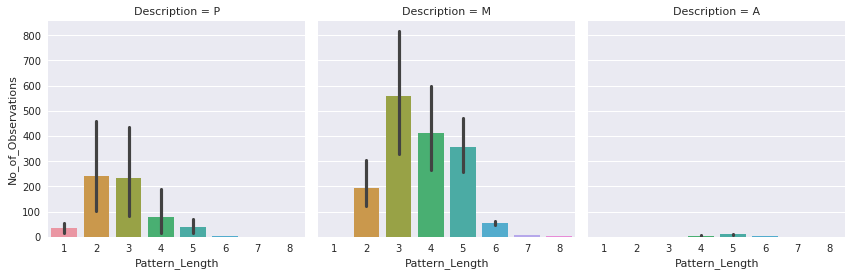

In [13]:
sns.factorplot(kind = 'bar', col = 'Description', x = 'Pattern_Length', y = 'No_of_Observations', data = Kalevala,\
              estimator = np.sum)

In [14]:
#Number of observations for words which are aberrant.
np.sum(Kalevala[Kalevala['Description'] == 'A']['No_of_Observations'])

19

In [15]:
#Total number of observations in the data set.
np.sum(Kalevala['No_of_Observations'])

2235

In [16]:
#Percentage of vowel patterns that are aberrant
np.sum(Kalevala[Kalevala['Description'] == 'A']['No_of_Observations'])/np.sum(Kalevala['No_of_Observations'])

0.008501118568232663

As illustrated by the factor plots, there are very few observation of words that are aberrant compared to words that are either pure or mixed. Also, only 19 out of the 2235 unique words present in the excerpt (0.85%) are aberrant, indicating that overall, Finnish words display vowel harmony (or at least, in this excerpt).

# 3) Determine if the aberrant words follow a certain pattern.

I first made a boxplot to determine the distribution of vowel pattern lengths for each type of vowel pattern.

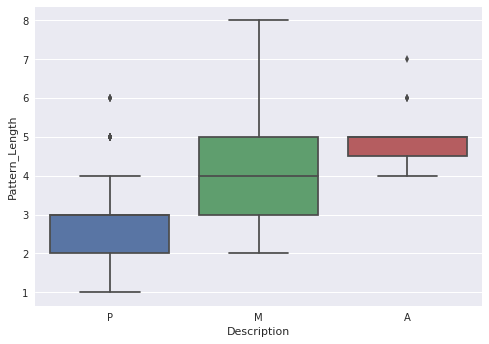

In [17]:
#I first created new columns in the FinVowel data frame.
FinVowel['Pattern_Length'] = FinVowel['Vowel_Pattern'].apply(len)
FinVowel['Description'] = FinVowel['Vowel_Pattern'].apply(description)

#I then created the boxplot.
sns.boxplot(data = FinVowel, x = 'Description', y = 'Pattern_Length')

It appears that words that are 'pure' tend to have a shorter pattern length compared to words that are ‘mixed’ and ‘aberrant’. Although there is too small a sample of ‘aberrant’ type words to draw more robust conclusions, it also appears that words that are ‘aberrant’ tend to be longer than ‘mixed’ words (and thus the longest out of all three types).

A visual inspection of the vowel pattern of aberrant words demonstrates that once the vowels switch from front to back or from back to front, while they may have middle vowels inserted in between them, the vowel class never switches again.

In [18]:
catdog

,Word,Vowel_Pattern,Description
53,alakäsille,BBFMM,A
142,emäpuu,MFBB,A
143,emäpuun,MFBB,A
436,kalaneväisen,BBMFMM,A
687,kultapyörä,BBFFF,A
688,kultapyörällä,BBFFFF,A
757,kymmenkunnan,FMBB,A
786,käsivarren,FMBM,A
839,lakkipäien,BMFMM,A
840,lakkipäitä,BMFMF,A


This makes sense once we understand how Finnish words are formed. Compound words in Finnish can be considered as separate words. As such, even though compound words may not exhibit vowel harmony, the separate words that make the compound words should exhibit vowel harmony.

(Translations may be inaccurate.)

In each of these examples, the separate words exhibit vowel harmony.
- emä (mother) + puun (tree) = emäpuun (mother tree)
- visa (birch) + perähän (towards) = visaperähän (towards the birch)
- visa (birch) + perästä (after) = visaperästä (after the birch)
- länsi (west) + tuuli (wind) = länsituuli (west wind)
- utu (haze/mist) + tyttö (girl) = ututyttö (girl in the mist)
- kymmen (decade) + kunan (present) = kymmenkunan (current decade)

The same rule violation/pattern can also be observed with prefixes and suffixes:
- vähä (prefix: few/very little) + varainen (resources) = vähävarainen (scarce resources)
- yli (prefix: senior/chief) + jumala (god) = ylijumala (the supreme god)

Sources used to arrive at this conclusion:
- https://wikivisually.com/wiki/Vowel_harmony
- https://en.wikibooks.org/wiki/Finnish/Grammar-Vowel_harmony
- https://en.wiktionary.org/wiki/Wiktionary:Main_Page

Special shout out to https://translate.google.com/#fi/en/